In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from keras.utils import to_categorical

import tensorflow as tf #Framework para deep learning
from tensorflow import keras
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch #API que contiene la mayoría de funciones para las RN

from keras import layers
##### REGULARIZACION #####
from keras import regularizers

import random

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Deep Learning\\deep_learning\\utils.py'>

In [2]:
x_train, y_train, x_test, y_test = utils.get_data(112)

----------Train----------
paper
rock
scissors
----------Test----------
paper
rock
scissors


In [38]:
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [3]:
### Estandarización de los datos
x_train2 = x_train/255
x_test2 = x_test/255
x_train2.shape

(2520, 112, 112)

Red Neuronal

In [8]:
model = keras.Sequential()

# Bloque convolucional 1
model.add(
    layers.Conv2D(
        filters = 16,
        kernel_size = (4, 4),
        strides = (2,2),
        activation='relu',
        input_shape = (112, 112, 1)
    )
)
model.add(
    layers.MaxPooling2D(
        pool_size = (4, 4),
        strides = (2,2)    
    )
)

# Bloque convolucional 2
model.add(
    layers.Conv2D(
        filters = 16,
        kernel_size = (4, 4),
        strides = (2,2),
        activation='relu'
    )
)
model.add(
    layers.MaxPooling2D(
        pool_size = (4, 4),
        strides = (2,2)    
    )
)

# Bloque convolucional 3
model.add(
    layers.Conv2D(
        filters = 32,
        kernel_size = (2, 2),
        strides = (1,1),
        activation='relu'
    )
)
model.add(
    layers.MaxPooling2D(
        pool_size = (2, 2),
        strides = (1,1)    
    )
)

# Bloque convolucional 4
model.add(
    layers.Conv2D(
        filters = 32,
        kernel_size = (2, 2),
        strides = (1,1),
        activation='relu'
    )
)
model.add(
    layers.MaxPooling2D(
        pool_size = (2, 2),
        strides = (1,1)    
    )
)

# Aplanar y agregar capas densas
model.add(
    layers.Flatten()
)

model.add(
    layers.Dense(128,
    activation ='relu'
    )
)

model.add(
    layers.Dense(64,
    activation ='relu'
    )
)


model.add(
    layers.Dense(32,
    activation ='relu'
    )
)


model.add(
    layers.Dense(
        3,
        activation='softmax'
        )
)

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 55, 55, 16)        272       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 16)        4112      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 32)          2080      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 32)         

In [13]:
# Establecer la semilla para NumPy
np.random.seed(42)

# Establecer la semilla para Python
random.seed(42)

# Establecer la semilla para TensorFlow v1.x
tf.compat.v1.set_random_seed(42)

In [14]:
history = model.fit(
    x_train2,
    y_train,
    epochs= 20,
    validation_split=0.2
)

Epoch 1/20
63/63 [==============================] - 3s 34ms/step - loss: 2.3151e-05 - accuracy: 1.0000 - val_loss: 0.9881 - val_accuracy: 0.8214
Epoch 2/20
63/63 [==============================] - 2s 31ms/step - loss: 2.1554e-05 - accuracy: 1.0000 - val_loss: 1.0484 - val_accuracy: 0.8175
Epoch 3/20
63/63 [==============================] - 2s 39ms/step - loss: 1.9451e-05 - accuracy: 1.0000 - val_loss: 0.9965 - val_accuracy: 0.8234
Epoch 4/20
63/63 [==============================] - 3s 47ms/step - loss: 1.8668e-05 - accuracy: 1.0000 - val_loss: 1.1037 - val_accuracy: 0.8056
Epoch 5/20
63/63 [==============================] - 2s 38ms/step - loss: 1.7870e-05 - accuracy: 1.0000 - val_loss: 1.0788 - val_accuracy: 0.8075
Epoch 6/20
63/63 [==============================] - 2s 38ms/step - loss: 1.6292e-05 - accuracy: 1.0000 - val_loss: 1.0690 - val_accuracy: 0.8175
Epoch 7/20
63/63 [==============================] - 3s 42ms/step - loss: 1.5314e-05 - accuracy: 1.0000 - val_loss: 1.0299 - val_ac

In [17]:
class_names = ['papel','piedra','tijera']

y_hat = np.argmax(model.predict(x_test2), axis = 1)

print(classification_report(y_test, y_hat, target_names=class_names))

12/12 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

       papel       0.95      0.90      0.92       124
      piedra       0.82      1.00      0.90       124
      tijera       0.98      0.81      0.89       124

    accuracy                           0.90       372
   macro avg       0.92      0.90      0.90       372
weighted avg       0.92      0.90      0.90       372



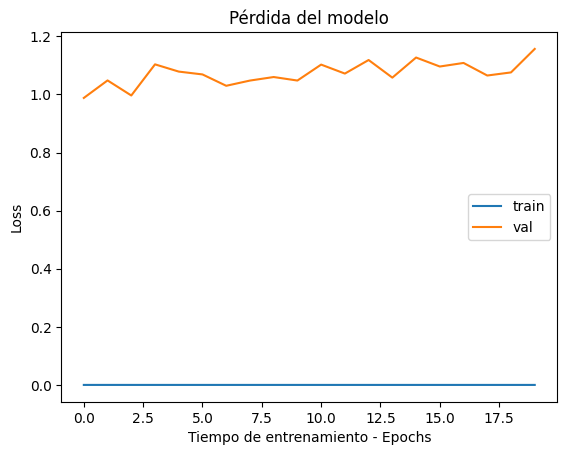

In [18]:
### Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

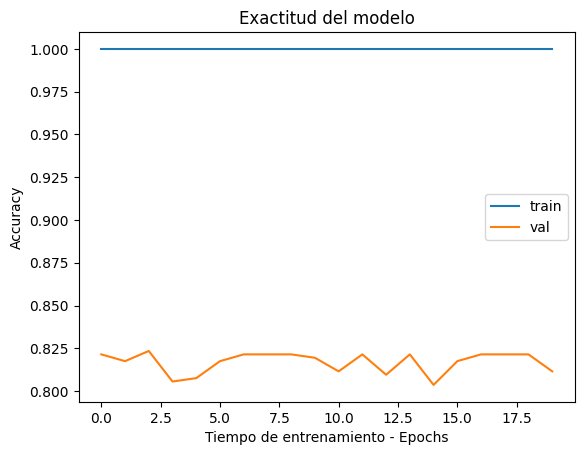

In [19]:
### Visualización de las curvas de error
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.xlabel('Tiempo de entrenamiento - Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

## Aplicar regularización

In [20]:
model_l2 = keras.Sequential()

# Bloque convolucional 1
model_l2.add(
    layers.Conv2D(
        filters = 16,
        kernel_size = (4, 4),
        strides = (2,2),
        activation='relu',
        input_shape = (112, 112, 1)
    )
)
model_l2.add(
    layers.MaxPooling2D(
        pool_size = (4, 4),
        strides = (2,2)    
    )
)

# Bloque convolucional 2
model_l2.add(
    layers.Conv2D(
        filters = 16,
        kernel_size = (4, 4),
        strides = (2,2),
        activation='relu'
    )
)
model_l2.add(
    layers.MaxPooling2D(
        pool_size = (4, 4),
        strides = (2,2)    
    )
)

# Bloque convolucional 3
model_l2.add(
    layers.Conv2D(
        filters = 32,
        kernel_size = (2, 2),
        strides = (1,1),
        activation='relu'
    )
)
model_l2.add(
    layers.MaxPooling2D(
        pool_size = (2, 2),
        strides = (1,1)
    )
)

# Bloque convolucional 4
model_l2.add(
    layers.Conv2D(
        filters = 32,
        kernel_size = (2, 2),
        strides = (1,1),
        activation='relu'
    )
)
model_l2.add(
    layers.MaxPooling2D(
        pool_size = (2, 2),
        strides = (1,1)    
    )
)

# Aplanar y agregar capas densas
model_l2.add(
    layers.Flatten()
)

model_l2.add(
    layers.Dense(128,
    activation ='relu',
    kernel_regularizer = regularizers.l2(l2 = 0.01)
    )
)

model_l2.add(
    layers.Dense(64,
    activation ='relu',
    kernel_regularizer = regularizers.l2(l2 = 0.01)
    )
)


model_l2.add(
    layers.Dense(32,
    activation ='relu',
    kernel_regularizer = regularizers.l2(l2 = 0.01)
    )
)


model_l2.add(
    layers.Dense(
        3,
        activation='softmax'
        )
)  # 10 clases para los 10 tipos de animales

# Compilar el modelo
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 55, 55, 16)        272       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        4112      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 32)          2080      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 3, 3, 32)         

In [21]:
history2 = model_l2.fit(
    x_train2,
    y_train,
    epochs= 20,
    validation_split=0.2
)

Epoch 1/20
63/63 [==============================] - 4s 36ms/step - loss: 2.1898 - accuracy: 0.4082 - val_loss: 2.4290 - val_accuracy: 0.0000e+00
Epoch 2/20
63/63 [==============================] - 2s 31ms/step - loss: 1.4409 - accuracy: 0.4306 - val_loss: 2.2208 - val_accuracy: 0.0000e+00
Epoch 3/20
63/63 [==============================] - 2s 33ms/step - loss: 0.9213 - accuracy: 0.6652 - val_loss: 2.3639 - val_accuracy: 0.0000e+00
Epoch 4/20
63/63 [==============================] - 2s 31ms/step - loss: 0.4677 - accuracy: 0.8418 - val_loss: 3.1275 - val_accuracy: 0.0000e+00
Epoch 5/20
63/63 [==============================] - 2s 30ms/step - loss: 0.2998 - accuracy: 0.9390 - val_loss: 3.7520 - val_accuracy: 0.1270
Epoch 6/20
63/63 [==============================] - 2s 31ms/step - loss: 0.1894 - accuracy: 0.9846 - val_loss: 2.3521 - val_accuracy: 0.4385
Epoch 7/20
63/63 [==============================] - 2s 31ms/step - loss: 0.1490 - accuracy: 0.9965 - val_loss: 2.7539 - val_accuracy: 0.41

### Afinamiento de himerparámetros

In [43]:
### Afinamiento de Hiperparámetros
hp = kt.HyperParameters()
lo = keras.losses.CategoricalCrossentropy()
name_metric = "prueba"
m2 = keras.metrics.Accuracy(name= name_metric)

def tun_model(hp):
    dor = hp.Float('DOR', min_value = 0.1, max_value= 0.6, step=0.1)
    l2 = hp.Float('REG', min_value = 0.01, max_value= 0.1, step=0.01)
    opt = hp.Choice('OPT', ['adam', 'sgd'])
    units_1 = hp.Int('UNITS_1', min_value = 64, max_value=512, step=32)
    
    model = keras.Sequential()

    # Bloque convolucional 1
    model.add(
        layers.Conv2D(
            filters = 16,
            kernel_size = (4, 4),
            strides = (2,2),
            activation='relu',
            input_shape = (112, 112, 1)
        )
    )
    model.add(
        layers.MaxPooling2D(
            pool_size = (4, 4),
            strides = (2,2)    
        )
    )

    # Bloque convolucional 2
    model.add(
        layers.Conv2D(
            filters = 16,
            kernel_size = (4, 4),
            strides = (2,2),
            activation='relu'
        )
    )
    model.add(
        layers.MaxPooling2D(
            pool_size = (4, 4),
            strides = (2,2)    
        )
    )

    # Bloque convolucional 3
    model.add(
        layers.Conv2D(
            filters = 32,
            kernel_size = (2, 2),
            strides = (1,1),
            activation='relu'
        )
    )
    model.add(
        layers.MaxPooling2D(
            pool_size = (2, 2),
            strides = (1,1)    
        )
    )

    # Bloque convolucional 4
    model.add(
        layers.Conv2D(
            filters = 32,
            kernel_size = (2, 2),
            strides = (1,1),
            activation='relu'
        )
    )
    model.add(
        layers.MaxPooling2D(
            pool_size = (2, 2),
            strides = (1,1)    
        )
    )

    # Aplanar y agregar capas densas
    model.add(
        layers.Flatten()
    )

    model.add(
        layers.Dense(
        units = units_1,
        activation ='relu',
        kernel_regularizer = regularizers.l2(l2 = l2)
        )
    )
    
    model.add(
        layers.Dropout(dor)
    )

    model.add(
        layers.Dense(
        units = units_1,
        activation ='relu'
        )
    )


    model.add(
        layers.Dense(
        units = units_1,
        activation ='relu'
        )
    )


    model.add(
        layers.Dense(
            3,
            activation='softmax'
            )
    )
    
    if opt == 'adam':
        opt = keras.optimizers.Adam (learning_rate=0.001)
    else:
        opt = keras.optimizers.SGD (learning_rate=0.001)
        
    model.compile(optimizer= opt, loss=lo, metrics=m2)
    
    return model

In [50]:
search_model = kt.RandomSearch(
    hypermodel = tun_model,
    hyperparameters = hp,
    objective = kt.Objective(name_metric, direction = 'max'),
    max_trials = 30,
    directory = '/results_tuner',
    project_name = 'PSR'
)

In [51]:
search_model.search(x_train2, y_train2, epochs=20, validation_split = 0.2)
search_model.results_summary()

Trial 2 Complete [00h 00m 06s]

Best prueba So Far: None
Total elapsed time: 00h 00m 13s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
0.5               |0.5               |DOR
0.07              |0.09              |REG
sgd               |sgd               |OPT
192               |352               |UNITS_1

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 4.8527 - prueba: 0.0000e+00

Traceback (most recent call last):
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hyperm

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\tuner_utils.py", line 76, in on_epoch_end
    self._save_model()
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_tuner\src\engine\tuner_utils.py", line 86, in _save_model
    self.model.save_weights(write_filepath)
tensorflow.python.framework.errors_impl.PermissionDeniedError: {{function_node __wrapped__MergeV2Checkpoints_device_/job:localhost/replica:0/task:0/device:CPU:0}} Failed to create a directory: /; Permission denied [Op:MergeV2Checkpoints]


In [36]:
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
model.predict(x_train2)

79/79 [==============================] - 1s 13ms/step


array([[1.0000000e+00, 2.7067885e-13, 1.0420527e-12],
       [1.0000000e+00, 1.8171341e-13, 6.2833126e-13],
       [1.0000000e+00, 2.9428575e-13, 3.8923522e-13],
       ...,
       [4.4172964e-05, 2.0184223e-05, 9.9993563e-01],
       [4.1763058e-05, 5.8673577e-05, 9.9989951e-01],
       [4.0433471e-05, 7.8179859e-05, 9.9988139e-01]], dtype=float32)

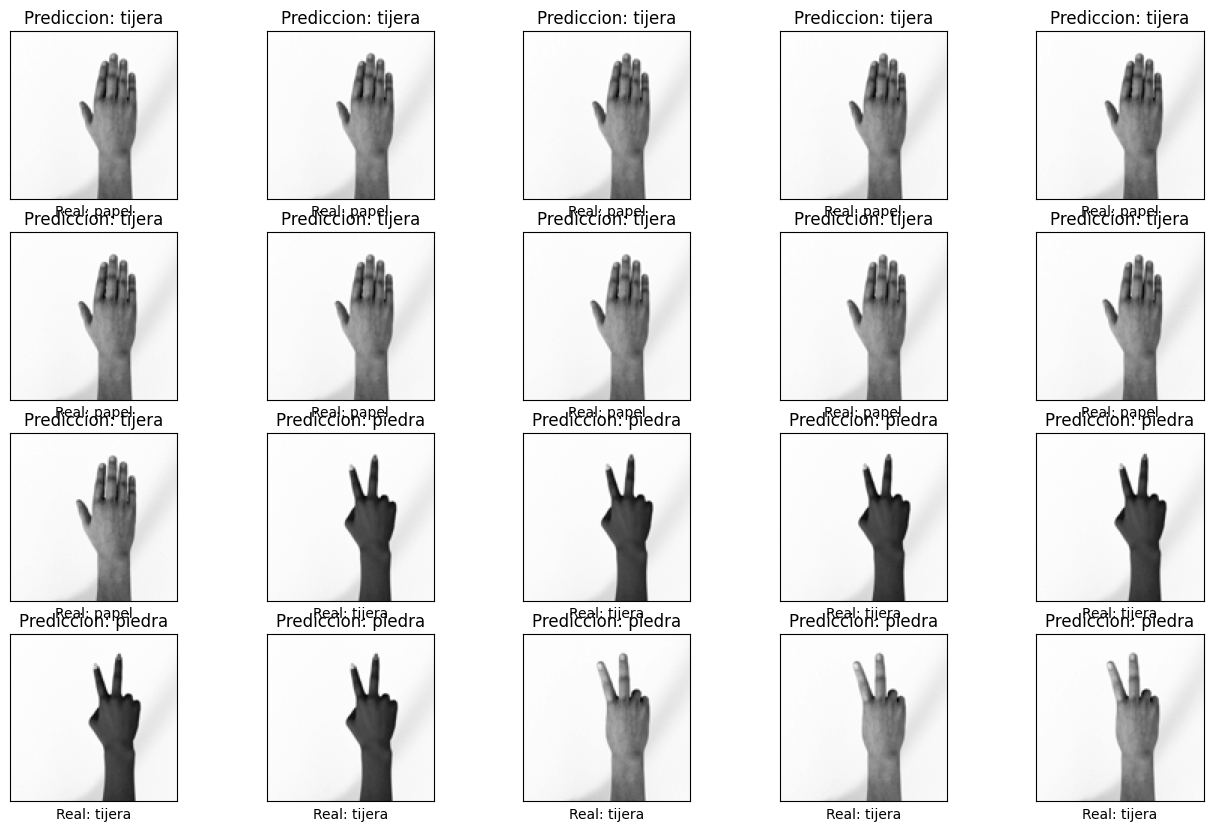

In [183]:
### Errores en la red neuronal
errors = np.nonzero(y_hat != y_test)[0]

# Visualizar las primeras 10 predicciones erroneas
plt.figure(figsize=(16, 10))
for i, incorrect in enumerate(errors[0:20]):
    plt.subplot(4,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(112,112), cmap = 'gray')
    plt.title("Prediccion: {}".format(class_names[y_hat[incorrect]]))
    plt.xlabel("Real: {}".format(class_names[y_test[incorrect]]))